# Introduction

In this lab, we will learn how to perform image segmentation using spectral clustering. We will generate an image with multiple connected circles and use spectral clustering to separate the circles.

# Generate the data

We will generate an image with four circles using numpy. We will then add some noise to the image and create a mask to limit the image to the foreground.

In [1]:
import numpy as np

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1**2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2**2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3**2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4**2

img = circle1 + circle2 + circle3 + circle4

mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

# Convert the image into a graph

We will use **img_to_graph** from **sklearn.feature_extraction.image** to convert the image into a graph. The value of the gradient on the edges will also be computed.

In [2]:
from sklearn.feature_extraction import image

graph = image.img_to_graph(img, mask=mask)

# Spectral clustering

We will use the **spectral_clustering** function from **sklearn.cluster** to perform spectral clustering. The **n_clusters** parameter is set to 4 to separate the four circles.

In [3]:
from sklearn.cluster import spectral_clustering

labels = spectral_clustering(graph, n_clusters=4, eigen_solver="arpack")

# Plot the results

We will plot the original image and the segmented image side by side using **matshow** from **matplotlib.pyplot**.

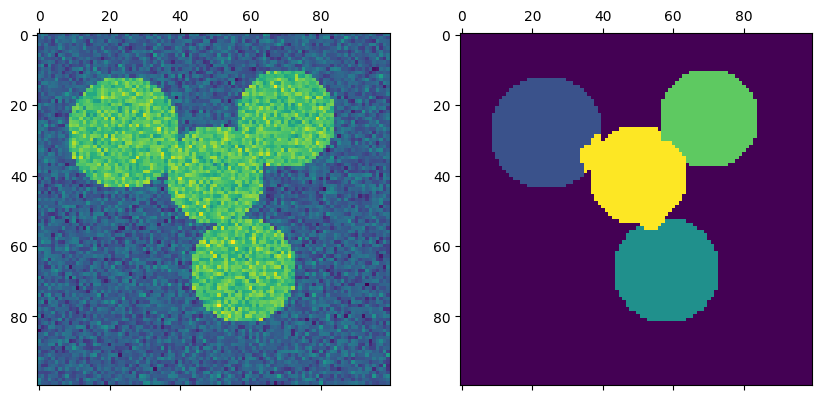

In [4]:
import matplotlib.pyplot as plt

label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[1].matshow(label_im)

plt.show()

# Plotting two circles

We will repeat the above process, but only consider the first two circles generated.

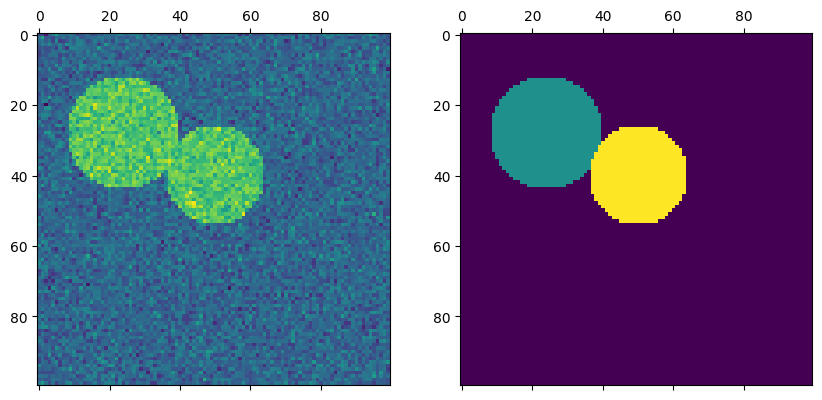

In [5]:
img = circle1 + circle2
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2 * np.random.randn(*img.shape)

graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

labels = spectral_clustering(graph, n_clusters=2, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[1].matshow(label_im)

plt.show()

# Summary

In this lab, we learned how to perform image segmentation using spectral clustering. We generated an image with multiple connected circles, converted the image into a graph, performed spectral clustering, and plotted the results.